# Import the necessary modules

In [1]:
##########################
#Importing necessary Modules
##########################
import urllib.request as urllib2 # to download websites

import numpy as np

import re
import nltk.corpus
import nltk
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import pandas
import collections

from bs4 import BeautifulSoup # to parse the websites
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.probability import FreqDist

from textblob import TextBlob
from textblob import TextBlob, Word
from collections import Counter

from nltk.tokenize import word_tokenize

from nltk.tag import pos_tag
from pylab import *



# Get text data from the webpage

In [2]:
# Extracting the text from the page

#url = "http://edition.cnn.com/2018/01/21/politics/macron-trump-relationship-intl/index.html"
#url = "http://edition.cnn.com/2018/01/29/asia/cambodia-arrests-intl/index.html?iid=ob_lockedrail_topeditorial"
#url = "https://www.state.gov/r/pa/prs/ps/2017/12/276632.htm"
#url = "http://www.bbc.com/news/uk-england-lancashire-42857155"
#url = "http://www.bbc.com/sport/tennis/42852967"
#url = "https://www.stopbullying.gov/what-is-bullying/index.html"
#url = "http://www.bbc.com/news/world-europe-34818994"
#url = "http://longnow.org/essays/technology-moving-too-fast/"
#url = "https://en.wikipedia.org/wiki/Child_abuse"
#url = "https://www.gatesnotes.com/Saving-Lives"
#url = "http://www.dictionary.com/browse/pencil?s=t"

#url = "https://www.snopes.com/dog-saves-abandoned-newborn/"
#url = "https://journals.lww.com/ajnonline/Abstract/2016/10000/Helping_Elders__Age_in_Place_.15.aspx"
#url = "http://www.redcross.ca/how-we-help/international-programs/maternal--newborn-and-child-health/long-term-maternal--newborn-and-child-health-programs/maternal--newborn-and-child-health-in-africa"
#url = "https://gentwenty.com/role-modeling-paving-the-way-for-younger-siblings/"
#url = "http://www.missbizibee.com/golden-celebration-60th-birthday-party-ideas-mom/"
#url = "https://www.lifesitenews.com/news/canadian-bishops-call-for-law-to-offer-protection-for-the-lives-of-the-unbo"
#url = "https://www.nature.com/scitable/knowledge/library/factors-affecting-global-climate-17079163"
#url = "https://www.thesun.co.uk/news/3799392/grenfell-tower-fire-victims-death-toll-how-many-died-london/"
url = "http://darkoutpost.com/history/the-real-story-behind-the-texas-chainsaw-massacre-the-notorious-killer-ed-gein/"
#url = "https://www.snopes.com/creepy-clown-haunted-house-massacre/"
#url = "https://www.forbes.com/sites/jamesconca/2013/09/29/forget-eagle-deaths-wind-turbines-kill-humans/#2aed68c05467"
#url = "https://en.wikipedia.org/wiki/Silver_(color)"
#url = "https://en.wikipedia.org/wiki/Wood"
#url = "https://en.wikipedia.org/wiki/Glass"
#url = "https://en.wikipedia.org/wiki/Picture_frame"
#url = "https://en.wikipedia.org/wiki/Door"
html = urllib2.urlopen(url).read()

# Using BeautifulSoap

soup = BeautifulSoup(html, "html.parser")
for line in soup(["script", "style"]):     
    line.extract()
    
    
text = soup.get_text()

text1 = str(text)


# Process the text

In [3]:
#tokenize all the words and remove the stop words
words_punt=  [word.lower() for word in word_tokenize(text) if word not in stopwords.words("english")]
#removes punctuations and special charechters
words = [word for word in words_punt if word.isalpha()]




# Frequency Calculation

In [4]:
# frequency distribution of words

# A dataframe with words and frequency


counts = Counter(words)
dic = {'Words':list(counts.keys()), 'Frequency':list(counts.values())}
import pandas as pd


df = pd.DataFrame(dic, columns=['Words','Frequency'] )

# The table for frequency-plotting

dfs= df.sort_values(['Frequency', 'Words'], ascending = False)
df10 = df.head(10)
print(df10)

       Words  Frequency
0        the         14
1       real          2
2      story          3
3     behind          2
4      texas          4
5   chainsaw          5
6   massacre          3
7  notorious          2
8     killer          4
9         ed         27


# Calculate the sentiment

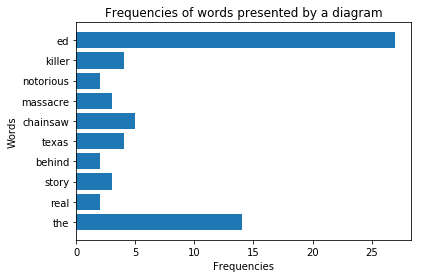

In [5]:
items = df10['Words']
y_pos = np.arange(len(items))
scores = df10['Frequency']
plt.barh(y_pos, scores)
plt.title('Frequencies of words presented by a diagram')
plt.ylabel('Words')
plt.yticks(y_pos, items)
plt.xlabel('Frequencies')
plt.show()


# Positive and Negative sentiment words

In [6]:

sid = SentimentIntensityAnalyzer()
pwl=[]
nwl=[]

# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in words:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pwl.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        nwl.append(word)
    
print('Positive:', pwl)
print('Negative:', nwl)

Positive: ['inspired', 'true', 'inspired', 'inspiration', 'inspiration', 'laugh', 'fond', 'friends', 'loved', 'played', 'devotion', 'ensure', 'alive', 'fondness', 'determined', 'capable', 'inspiration', 'novel', 'desire', 'hand', 'truth', 'like']
Negative: ['notorious', 'killer', 'murder', 'killing', 'torture', 'murder', 'notorious', 'killer', 'horror', 'difficult', 'maniac', 'killer', 'loner', 'suffered', 'abuse', 'severe', 'despised', 'tension', 'fear', 'fear', 'forbidden', 'punished', 'died', 'failure', 'die', 'fire', 'death', 'insane', 'death', 'abusive', 'devastated', 'death', 'died', 'odd', 'guilty', 'insanity', 'incompetent', 'insane', 'guilty', 'guilty', 'insanity', 'insane', 'died', 'grave', 'rob', 'devil', 'rejects', 'guilty', 'kill', 'brutal', 'murder', 'kills', 'dumps', 'horrific', 'abuse', 'death', 'cries', 'fatally', 'war', 'killer', 'arrested', 'killing', 'war', 'guilty', 'kill', 'murder', 'killing', 'torture', 'disturbing']


# Part of speech tagging

In [7]:
#part of speech tagging
pst= nltk.pos_tag(words)

# Verbs in the list

In [8]:
mylist_verbs = []
for list in pst:
    (a,b) = list
    if b in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
         mylist_verbs.append(str(list[0]))
print(mylist_verbs)

['massacre', 'dark', 'outpost', 'breaking', 'massacre', 'revolutionized', 'inspired', 'began', 'wielding', 'living', 'deranged', 'texas', 'said', 'taken', 'wrapped', 'making', 'chainsaw', 'born', 'lived', 'born', 'suffered', 'hands', 'classmates', 'remember', 'unnerving', 'told', 'hear', 'hold', 'despised', 'creating', 'shaping', 'fond', 'preaching', 'instilled', 'ed', 'hidden', 'secluded', 'kept', 'punished', 'making', 'reminded', 'loved', 'died', 'die', 'revolving', 'proven', 'played', 'left', 'devastated', 'remained', 'ensure', 'remain', 'died', 'confining', 'became', 'ed', 'took', 'remained', 'unsuspecting', 'revealed', 'found', 'began', 'see', 'searched', 'found', 'decapitated', 'hanging', 'barn', 'found', 'remains', 'including', 'made', 'covered', 'bedposts', 'trait', 'links', 'ed', 'turning', 'found', 'made', 'ed', 'pleaded', 'found', 'sent', 'insane', 'determined', 'standing', 'found', 'regarding', 'found', 'returned', 'died', 'buried', 'vandalized', 'found', 'robert', 'used', 

# Adjectives in the list

In [9]:
mylist_adj = []
for list in pst:
    (a,b) = list
    if b in ['JJ', 'JJR', 'JJS']:
         mylist_adj.append(str(list[0]))
print(mylist_adj)

['real', 'notorious', 'video', 'heinous', 'sensational', 'serial', 'january', 'real', 'notorious', 'true', 'circulate', 'actual', 'madman', 'inspired', 'august', 'quick', 'difficult', 'actual', 'occur', 'actual', 'serial', 'key', 'infamous', 'plainfield', 'reclusive', 'alcoholic', 'religious', 'heavy', 'psychological', 'physical', 'ed', 'reclusive', 'strange', 'loud', 'ed', 'severe', 'heavy', 'strict', 'biblical', 'instrumental', 'ed', 'old', 'general', 'forbidden', 'daily', 'april', 'mysterious', 'many', 'suspect', 'ed', 'insane', 'abusive', 'mother', 'left', 'obsessed', 'nazis', 'odd', 'reclusive', 'full', 'gein', 'november', 'worden', 'suspect', 'last', 'alive', 'upside', 'various', 'human', 'trashcan', 'human', 'human', 'human', 'skin', 'corset', 'skin', 'young', 'arraigned', 'guilty', 'incompetent', 'central', 'capable', 'guilty', 'november', 'second', 'guilty', 'central', 'insane', 'plainfield', 'ed', 'subject', 'many', 'likeness', 'rob', 'nature', 'human', 'connect', 'cancel', '

# Nouns in the list

In [10]:
mylist_nouns = []
for list in pst:
    (a,b) = list
    if b in ['NN', 'NNP', 'NNS', 'NNPS']:
         mylist_nouns.append(str(list[0]))
print(mylist_nouns)

['story', 'texas', 'chainsaw', 'killer', 'ed', 'gein', 'home', 'advertising', 'contact', 'news', 'acts', 'history', 'mass', 'murder', 'killing', 'torture', 'history', 'mass', 'murder', 'comments', 'story', 'texas', 'chainsaw', 'killer', 'ed', 'gein', 'tweet', 'director', 'tobe', 'hooper', 'horror', 'story', 'film', 'texas', 'chainsaw', 'massacre', 'film', 'release', 'rumors', 'chainsaw', 'family', 'town', 'events', 'place', 'check', 'date', 'reveals', 'film', 'days', 'base', 'film', 'event', 'maniac', 'film', 'inspiration', 'killer', 'ed', 'gein', 'inspiration', 'leatherface', 'wisconsin', 'ed', 'gein', 'life', 'loner', 'father', 'george', 'mother', 'augusta', 'ed', 'gein', 'abuse', 'parents', 'habits', 'habits', 'someone', 'joke', 'gein', 'alcoholic', 'job', 'father', 'george', 'wife', 'amount', 'tension', 'home', 'augusta', 'teachings', 'attitude', 'towards', 'women', 'testament', 'augusta', 'fear', 'god', 'sexuality', 'mistrust', 'women', 'brother', 'henry', 'family', 'farm', 'famil

# Positive and Negative verbs

In [11]:
mylist_verbs

sid = SentimentIntensityAnalyzer()
pos_verbs_list=[]
neg_verbs_list=[]
neu_verbs_list=[]

# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in mylist_verbs:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pos_verbs_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        neg_verbs_list.append(word)
    else:
        neu_verbs_list.append(word)

# Printing

print('Positive :',pos_verbs_list)          
print('Negative :',neg_verbs_list)
print('Neutral :',neu_verbs_list)

ca = Counter(pos_verbs_list)
print(ca.most_common())

Positive : ['inspired', 'fond', 'loved', 'played', 'ensure', 'determined']
Negative : ['suffered', 'despised', 'punished', 'died', 'die', 'devastated', 'died', 'insane', 'died', 'rejects', 'kill', 'kills', 'dumps', 'arrested', 'killing', 'kill', 'killing']
Neutral : ['massacre', 'dark', 'outpost', 'breaking', 'massacre', 'revolutionized', 'began', 'wielding', 'living', 'deranged', 'texas', 'said', 'taken', 'wrapped', 'making', 'chainsaw', 'born', 'lived', 'born', 'hands', 'classmates', 'remember', 'unnerving', 'told', 'hear', 'hold', 'creating', 'shaping', 'preaching', 'instilled', 'ed', 'hidden', 'secluded', 'kept', 'making', 'reminded', 'revolving', 'proven', 'left', 'remained', 'remain', 'confining', 'became', 'ed', 'took', 'remained', 'unsuspecting', 'revealed', 'found', 'began', 'see', 'searched', 'found', 'decapitated', 'hanging', 'barn', 'found', 'remains', 'including', 'made', 'covered', 'bedposts', 'trait', 'links', 'ed', 'turning', 'found', 'made', 'ed', 'pleaded', 'found', '

# Positive and Negative adjectives

In [12]:
mylist_adj

sid = SentimentIntensityAnalyzer()
pos_adj_list=[]
neg_adj_list=[]
neu_adj_list=[]

# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in mylist_adj:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pos_adj_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        neg_adj_list.append(word)
    else:
        neu_adj_list.append(word)
        
# Printing

print('Positive :',pos_adj_list)          
print('Negative :',neg_adj_list)
print('Neutral :',neu_adj_list)

ca = Counter(pos_adj_list)
print(ca.most_common())

Positive : ['true', 'inspired', 'alive', 'capable']
Negative : ['notorious', 'notorious', 'difficult', 'severe', 'forbidden', 'insane', 'abusive', 'odd', 'guilty', 'incompetent', 'guilty', 'guilty', 'insane', 'rob', 'guilty', 'brutal', 'horrific', 'guilty', 'disturbing']
Neutral : ['real', 'video', 'heinous', 'sensational', 'serial', 'january', 'real', 'circulate', 'actual', 'madman', 'august', 'quick', 'actual', 'occur', 'actual', 'serial', 'key', 'infamous', 'plainfield', 'reclusive', 'alcoholic', 'religious', 'heavy', 'psychological', 'physical', 'ed', 'reclusive', 'strange', 'loud', 'ed', 'heavy', 'strict', 'biblical', 'instrumental', 'ed', 'old', 'general', 'daily', 'april', 'mysterious', 'many', 'suspect', 'ed', 'mother', 'left', 'obsessed', 'nazis', 'reclusive', 'full', 'gein', 'november', 'worden', 'suspect', 'last', 'upside', 'various', 'human', 'trashcan', 'human', 'human', 'human', 'skin', 'corset', 'skin', 'young', 'arraigned', 'central', 'november', 'second', 'central', 'p

# Positive and Negative nouns

In [13]:
mylist_nouns

sid = SentimentIntensityAnalyzer()
pos_nouns_list=[]
neg_nouns_list=[]
neu_nouns_list=[]


# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in mylist_nouns:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pos_nouns_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        neg_nouns_list.append(word)
    else:
        neu_nouns_list.append(word)

# Printing

print('Positive :',pos_nouns_list)          
print('Negative :',neg_nouns_list)
print('Neutral :',neu_nouns_list)

Positive : ['inspiration', 'inspiration', 'friends', 'devotion', 'fondness', 'inspiration', 'novel', 'desire', 'hand']
Negative : ['killer', 'murder', 'killing', 'torture', 'murder', 'killer', 'horror', 'maniac', 'killer', 'loner', 'abuse', 'tension', 'fear', 'failure', 'fire', 'death', 'death', 'death', 'insanity', 'insanity', 'grave', 'devil', 'murder', 'abuse', 'death', 'cries', 'war', 'killer', 'war', 'murder', 'torture']
Neutral : ['story', 'texas', 'chainsaw', 'ed', 'gein', 'home', 'advertising', 'contact', 'news', 'acts', 'history', 'mass', 'history', 'mass', 'comments', 'story', 'texas', 'chainsaw', 'ed', 'gein', 'tweet', 'director', 'tobe', 'hooper', 'story', 'film', 'texas', 'chainsaw', 'massacre', 'film', 'release', 'rumors', 'chainsaw', 'family', 'town', 'events', 'place', 'check', 'date', 'reveals', 'film', 'days', 'base', 'film', 'event', 'film', 'ed', 'gein', 'leatherface', 'wisconsin', 'ed', 'gein', 'life', 'father', 'george', 'mother', 'augusta', 'ed', 'gein', 'parents

In [15]:

essays = pst
nouns = [word for word,pos in pst\
	if (pos == 'NN')]
#print(nouns)
#downcased = [x.lower() for x in nouns]
#joined = " ".join(downcased).encode('utf-8')
#into_string = str(nouns)
#print(nouns)
#downcased = [x.lower() for x in nouns]
#joined = " ".join(downcased).encode('utf-8')
#into_string = str(nouns)

counts_noun= Counter(nouns)

dic = {'Nouns':list(counts.keys()), 'Frequency':list(counts.values())}
import pandas as pd
df_noun= pd.DataFrame(dic, columns=['Nouns','Frequency'])
dfs_noun = df_noun.sort_values(['Frequency', 'Nouns'], ascending = False)
df5 = df.head(5)
print(df5)



TypeError: 'tuple' object is not callable

In [16]:
analyser = SentimentIntensityAnalyzer()
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print(snt)
#    return snt
    
    df= pd.DataFrame(snt,index=[0])
    max_sent= df[['pos','neg','neu']].idxmax(axis=1)
    print(max_sent[0])
    return max_sent[0]
#    print(snt)
    

max_sent = print_sentiment_scores(text)

print(max_sent)

if max_sent == 'pos':
        print('+'*100)
        print('The text has a positive statement.', '\nThe most frequently 5 used nouns are: \n\n', Counter(nouns).most_common(5), '\n\nThe most frequently used positive adjectives are:\n\n', Counter(pos_adj_list).most_common(10), '\nThe most frequently used positive verbs are:\n\n', Counter(pos_adj_list).most_common(10))
        print('+'*100)       
        
elif max_sent == 'neg':
        print('-'*100)
        print('The text has a negative statement.\n', '\nThe most frequently 5 used nouns are:\n\n', Counter(nouns).most_common(5), '\n\nThe most frequently used negative adjectives are:\n\n', Counter(neg_adj_list).most_common(10), '\nThe most frequently used negative verbs are:\n\n', Counter(neg_adj_list).most_common(10))
        print('-'*100)
            
elif max_sent == 'neu':
        print('.'*100)
        print('The text has a neutral statement.\n', '\nThe most frequently 5 used nouns are:\n\n', Counter(nouns).most_common(5), '\n\nThe most frequently used neutral adjectives are:\n\n', Counter(neu_adj_list).most_common(10), '\n\nThe most frequently used neutral verbs are:\n\n', Counter(neu_adj_list).most_common(10))
        print('.'*100)

{'neg': 0.224, 'neu': 0.705, 'pos': 0.071, 'compound': -0.9997}
neu
neu
....................................................................................................
The text has a neutral statement.
 
The most frequently 5 used nouns are:

 [('ed', 13), ('family', 10), ('gein', 7), ('film', 7), ('farm', 6)] 

The most frequently used neutral adjectives are:

 [('human', 6), ('ed', 5), ('serial', 4), ('january', 3), ('actual', 3), ('reclusive', 3), ('november', 3), ('real', 2), ('heinous', 2), ('sensational', 2)] 

The most frequently used neutral verbs are:

 [('human', 6), ('ed', 5), ('serial', 4), ('january', 3), ('actual', 3), ('reclusive', 3), ('november', 3), ('real', 2), ('heinous', 2), ('sensational', 2)]
....................................................................................................
